In [3]:
import pandas as pad
import numpy as nup
import glob
import soundfile
import os
import sys

In [4]:
pip install librosa


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import librosa
import librosa.display
import seaborn as sbn
import matplotlib.pyplot as mplt
from sklearn import metrics

In [6]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


In [7]:
from IPython.display import Audio

In [8]:
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [14]:
RavdessData = "C:\\Users\\gypra\\Downloads\\archive\\"

In [15]:
ravdessDirectoryList=os.listdir(RavdessData)
fileEmotion=[]
filePath=[]
for dir in ravdessDirectoryList:
    actor=os.listdir(RavdessData+dir)
    for file in actor:
        part=file.split('.')[0]
        part=part.split('-')
        fileEmotion.append(int(part[2]))
        filePath.append(RavdessData+dir+'/'+file)
emotion_df =pad.DataFrame(fileEmotion,columns=['Emotions'])
path_df=pad.DataFrame(filePath,columns=['Path'])
Ravdess_df=pad.concat([emotion_df,path_df],axis=1)

In [16]:
Ravdess_df.Emotions.replace({1:'neutral',2:'calm',3:"happy",4:'sad',5:'angry',6:'fear',7:'disgust',8:'suprise'},inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,C:\Users\gypra\Downloads\archive\Actor_01/03-0...
1,neutral,C:\Users\gypra\Downloads\archive\Actor_01/03-0...
2,neutral,C:\Users\gypra\Downloads\archive\Actor_01/03-0...
3,neutral,C:\Users\gypra\Downloads\archive\Actor_01/03-0...
4,calm,C:\Users\gypra\Downloads\archive\Actor_01/03-0...


In [17]:
dataPath=pad.concat([Ravdess_df],axis=0)
dataPath.to_csv("data_path.csv",index=False)
dataPath.head()

,Emotions,Path
0,neutral,C:\Users\gypra\Downloads\archive\Actor_01/03-0...
1,neutral,C:\Users\gypra\Downloads\archive\Actor_01/03-0...
2,neutral,C:\Users\gypra\Downloads\archive\Actor_01/03-0...
3,neutral,C:\Users\gypra\Downloads\archive\Actor_01/03-0...
4,calm,C:\Users\gypra\Downloads\archive\Actor_01/03-0...


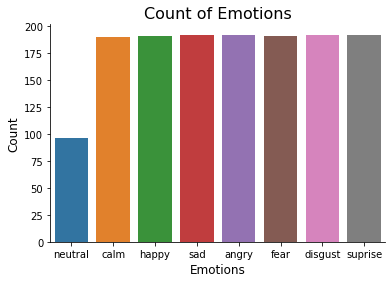

In [18]:
mplt.title('Count of Emotions',size=16)
sbn.countplot(dataPath.Emotions)
mplt.ylabel('Count',size=12)
mplt.xlabel('Emotions',size=12)
sbn.despine(top=True,right=True,left=False,bottom=False)
mplt.show()

In [19]:
def createWavePlot(data,sr,e):
    mplt.figure(figsize=(10,3))
    mplt.title('Waveplot for Audio with {} emotion'.format(e),size=15)
    librosa.display.waveshow(data,sr=sr)
    mplt.show()

In [20]:
def createSpectogram(data,sr,e):
    X=librosa.stft(data)
    Xdb=librosa.amplitude_to_db(abs(X))
    mplt.figure(figsize=(12,3))
    mplt.title('Spectogram for Audio with {} emotion'.format(e),size=15)
    librosa.display.specshow(Xdb,sr=sr,x_axis='time',y_axis='hz')
    mplt.colorbar()

emotion='fear'

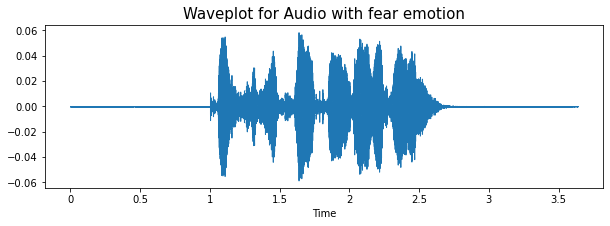

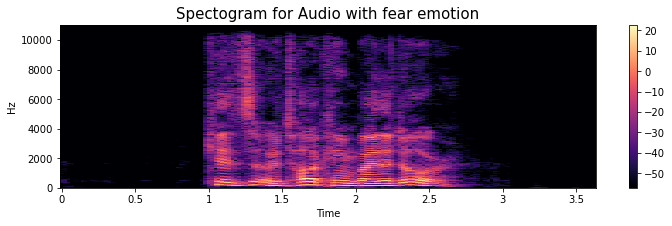

In [21]:
emotion='fear'
path=nup.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data,samplingRate=librosa.load(path)
createWavePlot(data,samplingRate,emotion)
createSpectogram(data,samplingRate,emotion)
Audio(path)

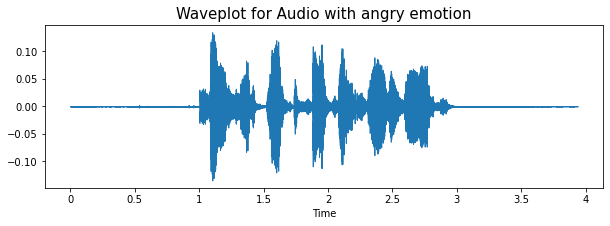

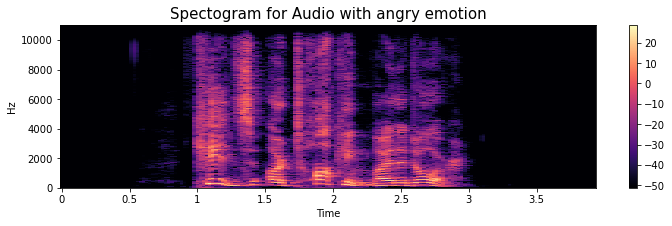

In [22]:
emotion='angry'
path=nup.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data,samplingRate=librosa.load(path)
createWavePlot(data,samplingRate,emotion)
createSpectogram(data,samplingRate,emotion)
Audio(path)

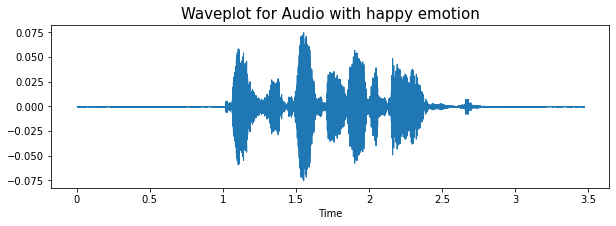

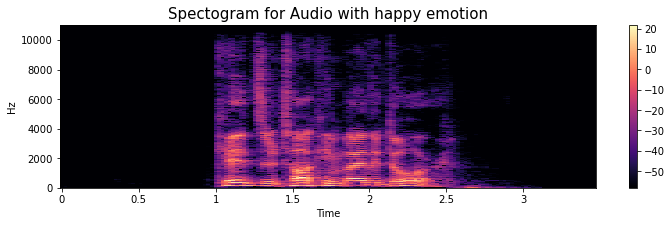

In [23]:
emotion='happy'
path=nup.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data,samplingRate=librosa.load(path)
createWavePlot(data,samplingRate,emotion)
createSpectogram(data,samplingRate,emotion)
Audio(path)

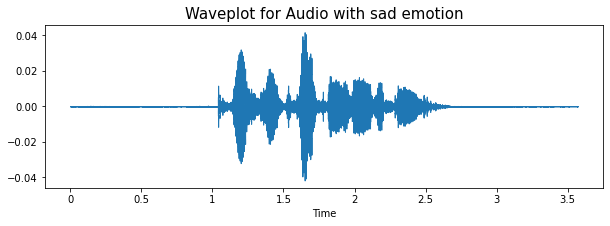

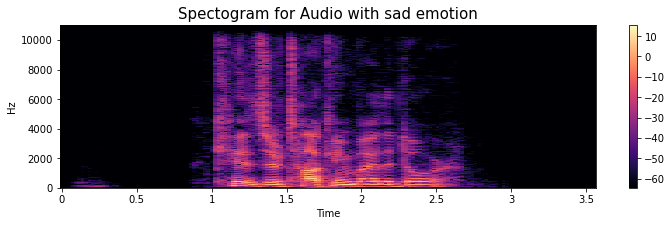

In [24]:
emotion='sad'
path=nup.array(dataPath.Path[dataPath.Emotions==emotion])[1]
data,samplingRate=librosa.load(path)
createWavePlot(data,samplingRate,emotion)
createSpectogram(data,samplingRate,emotion)
Audio(path)

In [25]:
def noise(data):
    noiseAmp=0.035*nup.random.uniform()*nup.amax(data)
    data=data+noiseAmp*nup.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=0.8)

def shift(data):
    shiftRange=int(nup.random.uniform(low=-5,high=5)*1000)
    return nup.roll(data,shiftRange)

def pitch(data, samplingRate, pitchFactor=0.7):
    return librosa.effects.pitch_shift(data, samplingRate, n_steps=pitchFactor)

In [26]:
path=nup.array(dataPath.Path)[1]
data, sampleRate=librosa.load(path)


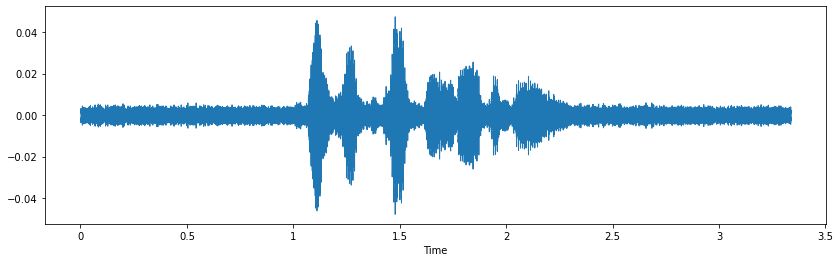

In [27]:
x=noise(data)
mplt.figure(figsize=(14,4))
librosa.display.waveshow(y=x,sr=sampleRate)
Audio(x,rate=sampleRate)

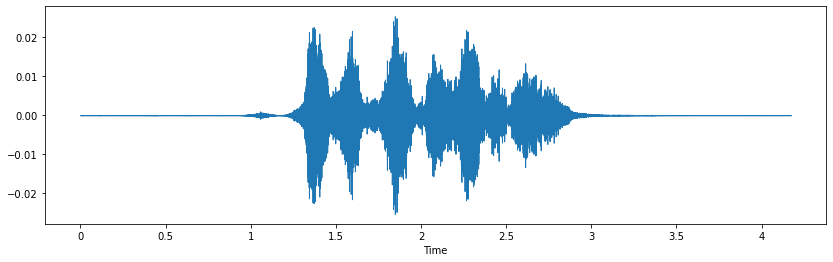

In [28]:
x=stretch(data) 
mplt.figure(figsize=(14,4))
librosa.display.waveshow(y=x,sr=sampleRate)
Audio(x,rate=sampleRate)

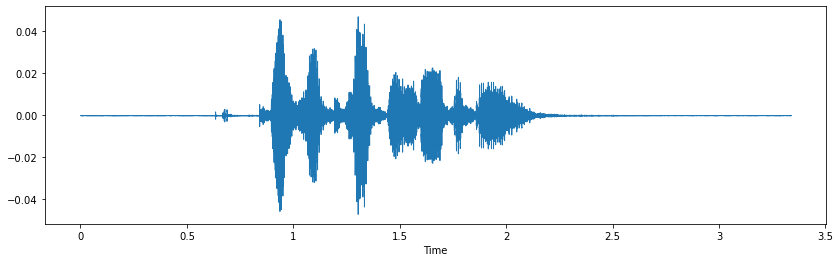

In [29]:
x=shift(data)
mplt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampleRate)
Audio(x,rate=sampleRate)

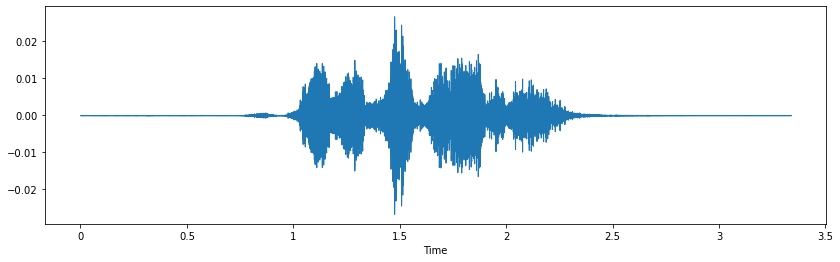

In [30]:
x = pitch(data, samplingRate, pitchFactor=0.7)
mplt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sampleRate)
Audio(x, rate=sampleRate)

In [31]:
def extractFeature(fileName, mfcc, chroma, mel):
    with soundfile.SoundFile(fileName) as soundFile:
        X=soundFile.read(dtype="float32")
        sampleRate=soundFile.samplerate
        if chroma:
            stft=nup.abs(librosa.stft(X))
        result=[]
        if mfcc:
            mfccs=nup.mean(librosa.feature.mfcc(y=X, sr=sampleRate, n_mfcc=40).T, axis=0)
            result.append(mfccs)
        if chroma:
            chroma=nup.mean(librosa.feature.chroma_stft(S=stft,sr=sampleRate).T,axis=0)
            result.append(chroma)
        if mel:
            mel=nup.mean(librosa.feature.melspectrogram(X, sr=sampleRate).T,axis=0)
            result.append(mel)
    return nup.hstack(result)

In [32]:
emotions={
    '01':'neutral',
    '02':'calm',
    '03':'happy',
    '04':'sad',
    '05':'angry',
    '06':'fearful',
    '07':'disgust',
    '08':'suprised'
}
observedEmotions=['calm','happy','fearful','disgust']

In [33]:
def loadData(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("C:\\Users\\gypra\\Downloads\\archive\\Actor_*\\*.wav"):
        fileName=os.path.basename(file)
        emotion1=emotions[fileName.split("-")[2]]
        if emotion1 not in observedEmotions:
            continue
        feature=extractFeature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion1)
    return train_test_split(nup.array(x),y,test_size=test_size,random_state=9)

In [35]:
#splitting dataset
xTrain,xTest,yTrain,yTest=loadData(test_size=0.23)


In [41]:
pip install "librosa==0.9.1"

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

